### Data Variable Discerption
            E Comm CustomerID Unique customer ID
            E Comm Churn Churn Flag (Customer stop using/buying your products)
            E Comm Tenure Tenure of customer in organization
            E Comm PreferredLoginDevice Preferred login device of customer
            E Comm CityTier City tier
            E Comm WarehouseToHome Distance in between warehouse to home of customer
            E Comm PreferredPaymentMode Preferred payment method of customer
            E Comm Gender Gender of customer
            E Comm HourSpendOnApp Number of hours spend on mobile application or website
            E Comm NumberOfDeviceRegistered Total number of deceives is registered on particular customer
            E Comm PreferedOrderCat Preferred order category of customer in last month
            E Comm SatisfactionScore Satisfactory score of customer on service
            E Comm MaritalStatus Marital status of customer
            E Comm NumberOfAddress Total number of added added on particular customer
            E Comm Complain Any complaint has been raised in last month
            E Comm OrderAmountHikeFromlastYear Percentage increases in order from last year
            E Comm CouponUsed Total number of coupon has been used in last month
            E Comm OrderCount Total number of orders has been places in last month
            E Comm DaySinceLastOrder Day Since last order by customer
            E Comm CashbackAmount Average cashback in last month

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 
import json

from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

## Problem Statement :

        To predict churn of a customer based on following factors.
    
    

## Data Gathering

In [2]:
df = pd.read_excel("E Commerce Dataset.xlsx",sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [6]:
df.drop('CustomerID',axis = 1,inplace = True)

In [7]:
df.select_dtypes(include = 'object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


## Feature Engineering

In [8]:
df["PreferredLoginDevice"].value_counts().to_dict()
df['PreferredLoginDevice'].replace({'Mobile Phone': 0, 'Computer': 1,'Phone':0},inplace = True)

In [9]:
df['PreferredPaymentMode'].value_counts().to_dict()
df['PreferredPaymentMode'].replace({ 'Debit Card': 1,
                                     'Credit Card': 2,
                                     'E wallet': 4,
                                     'UPI': 3,
                                     'COD': 0,
                                     'CC': 2,
                                     'Cash on Delivery': 0},inplace = True
                                    )

In [10]:
df['Gender'].value_counts().to_dict()
df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)


In [11]:
df['MaritalStatus'].value_counts().to_dict()
df['MaritalStatus'].replace({'Married': 1, 'Single': 0, 'Divorced': 2},inplace = True)

In [12]:
df['PreferedOrderCat'].value_counts().to_dict()
df['PreferedOrderCat'].replace({'Mobile Phone':'Mobile'},inplace = True)

In [13]:
df['PreferedOrderCat'].value_counts().to_dict()

{'Mobile': 2080,
 'Laptop & Accessory': 2050,
 'Fashion': 826,
 'Grocery': 410,
 'Others': 264}

In [14]:
df = pd.get_dummies(df,columns = ['PreferedOrderCat'])
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,1,4.0,0,3,6.0,1,1,3.0,3,2,...,11.0,1.0,1.0,5.0,159.93,0,0,1,0,0
1,1,NaN,0,1,8.0,3,0,3.0,4,3,...,15.0,0.0,1.0,0.0,120.90,0,0,0,1,0
2,1,NaN,0,1,30.0,1,0,2.0,4,3,...,14.0,0.0,1.0,3.0,120.28,0,0,0,1,0
3,1,0.0,0,3,15.0,1,0,2.0,4,5,...,23.0,0.0,1.0,3.0,134.07,0,0,1,0,0
4,1,0.0,0,1,12.0,2,0,NaN,3,5,...,11.0,1.0,1.0,3.0,129.60,0,0,0,1,0


In [15]:
df.shape

(5630, 23)

## Churn Distribution

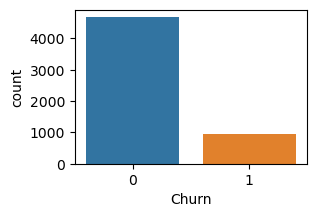

In [16]:
plt.figure(figsize = (3,2))
sns.countplot(x = df['Churn'])
plt.show()

## Gender Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


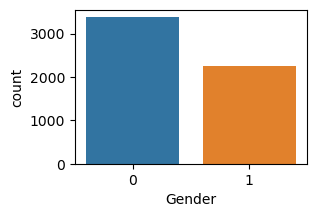

In [17]:
plt.figure(figsize = (3,2))
sns.countplot(df['Gender'])
plt.show()

In [18]:
df.isnull().sum()

Churn                                    0
Tenure                                 264
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                        251
PreferredPaymentMode                     0
Gender                                   0
HourSpendOnApp                         255
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
MaritalStatus                            0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear            265
CouponUsed                             256
OrderCount                             258
DaySinceLastOrder                      307
CashbackAmount                           0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrderCat_Others                  0
dtype: int6

In [19]:
df.describe()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
count,5630.000000,5366.000000,5630.000000,5630.000000,5379.000000,5630.000000,5630.000000,5375.000000,5630.000000,5630.000000,...,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,10.189899,0.290231,1.654707,15.639896,1.698046,0.398934,2.931535,3.688988,3.066785,...,15.707922,1.751023,3.008004,4.543491,177.223030,0.146714,0.072824,0.364121,0.369449,0.046892
std,0.374240,8.557241,0.453909,0.915389,8.531475,1.093162,0.489723,0.721926,1.023999,1.380194,...,3.675485,1.894621,2.939680,3.654433,49.207036,0.353852,0.259871,0.481225,0.482699,0.211426
min,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,9.000000,1.000000,0.000000,2.000000,3.000000,2.000000,...,13.000000,1.000000,1.000000,2.000000,145.770000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,9.000000,0.000000,1.000000,14.000000,1.000000,0.000000,3.000000,4.000000,3.000000,...,15.000000,1.000000,2.000000,3.000000,163.280000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,16.000000,1.000000,3.000000,20.000000,2.000000,1.000000,3.000000,4.000000,4.000000,...,18.000000,2.000000,3.000000,7.000000,196.392500,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,61.000000,1.000000,3.000000,127.000000,4.000000,1.000000,5.000000,6.000000,5.000000,...,26.000000,16.000000,16.000000,46.000000,324.990000,1.000000,1.000000,1.000000,1.000000,1.000000


## Impute Missing Values by KNN Imputer

In [20]:
x = df.drop('Churn',axis = 1)

In [21]:
impute = KNNImputer()
arr = impute.fit_transform(x)
x_df = pd.DataFrame(arr,columns = x.columns)
x_df.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,4.0,0.0,3.0,6.0,1.0,1.0,3.0,3.0,2.0,0.0,...,11.0,1.0,1.0,5.0,159.93,0.0,0.0,1.0,0.0,0.0
1,10.0,0.0,1.0,8.0,3.0,0.0,3.0,4.0,3.0,0.0,...,15.0,0.0,1.0,0.0,120.90,0.0,0.0,0.0,1.0,0.0
2,9.0,0.0,1.0,30.0,1.0,0.0,2.0,4.0,3.0,0.0,...,14.0,0.0,1.0,3.0,120.28,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,3.0,15.0,1.0,0.0,2.0,4.0,5.0,0.0,...,23.0,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,12.0,2.0,0.0,2.2,3.0,5.0,0.0,...,11.0,1.0,1.0,3.0,129.60,0.0,0.0,0.0,1.0,0.0


In [22]:
x_df.isna().sum()

Tenure                                 0
PreferredLoginDevice                   0
CityTier                               0
WarehouseToHome                        0
PreferredPaymentMode                   0
Gender                                 0
HourSpendOnApp                         0
NumberOfDeviceRegistered               0
SatisfactionScore                      0
MaritalStatus                          0
NumberOfAddress                        0
Complain                               0
OrderAmountHikeFromlastYear            0
CouponUsed                             0
OrderCount                             0
DaySinceLastOrder                      0
CashbackAmount                         0
PreferedOrderCat_Fashion               0
PreferedOrderCat_Grocery               0
PreferedOrderCat_Laptop & Accessory    0
PreferedOrderCat_Mobile                0
PreferedOrderCat_Others                0
dtype: int64

## Outliers Detection

In [23]:
x_df.dtypes

Tenure                                 float64
PreferredLoginDevice                   float64
CityTier                               float64
WarehouseToHome                        float64
PreferredPaymentMode                   float64
Gender                                 float64
HourSpendOnApp                         float64
NumberOfDeviceRegistered               float64
SatisfactionScore                      float64
MaritalStatus                          float64
NumberOfAddress                        float64
Complain                               float64
OrderAmountHikeFromlastYear            float64
CouponUsed                             float64
OrderCount                             float64
DaySinceLastOrder                      float64
CashbackAmount                         float64
PreferedOrderCat_Fashion               float64
PreferedOrderCat_Grocery               float64
PreferedOrderCat_Laptop & Accessory    float64
PreferedOrderCat_Mobile                float64
PreferedOrder

In [24]:
df1 = x_df.drop(['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery',
         'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile',
         'PreferedOrderCat_Others','MaritalStatus','CityTier','Complain'],axis = 1)
df1       

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3.0,2.0,9.0,11.0,1.0,1.0,5.0,159.93
1,10.0,8.0,3.0,4.0,3.0,7.0,15.0,0.0,1.0,0.0,120.90
2,9.0,30.0,2.0,4.0,3.0,6.0,14.0,0.0,1.0,3.0,120.28
3,0.0,15.0,2.0,4.0,5.0,8.0,23.0,0.0,1.0,3.0,134.07
4,0.0,12.0,2.2,3.0,5.0,3.0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2.0,1.0,6.0,18.0,1.0,2.0,4.0,150.71
5626,13.0,13.0,3.0,5.0,5.0,6.0,16.0,1.0,2.0,9.0,224.91
5627,1.0,11.0,3.0,2.0,4.0,3.0,21.0,1.0,2.0,4.0,186.42
5628,23.0,9.0,4.0,5.0,4.0,4.0,15.0,2.0,2.0,9.0,178.90


In [25]:
df1.shape

(5630, 11)

In [26]:
df1.dtypes

Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered       float64
SatisfactionScore              float64
NumberOfAddress                float64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


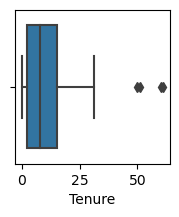

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


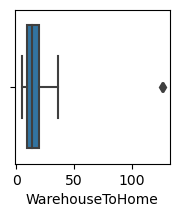

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


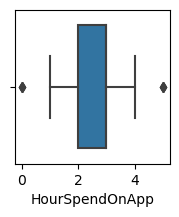

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


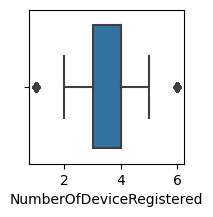

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


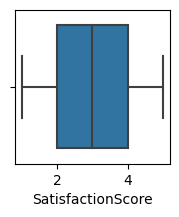

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


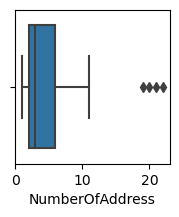

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


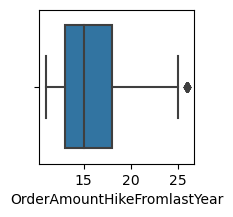

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


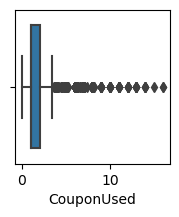

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


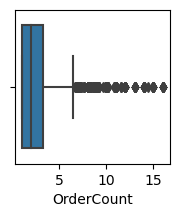

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


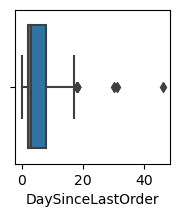

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


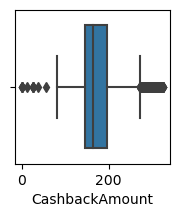

In [27]:
for i in df1.columns:
    plt.figure(figsize = (2,2))
    sns.boxplot(x_df[i])
    plt.show()

## Outliers Handling

In [28]:
df2 = x_df.drop(['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery',
         'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile',
         'PreferedOrderCat_Others','MaritalStatus','CityTier','Complain','SatisfactionScore'],axis = 1)
df2       

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3.0,9.0,11.0,1.0,1.0,5.0,159.93
1,10.0,8.0,3.0,4.0,7.0,15.0,0.0,1.0,0.0,120.90
2,9.0,30.0,2.0,4.0,6.0,14.0,0.0,1.0,3.0,120.28
3,0.0,15.0,2.0,4.0,8.0,23.0,0.0,1.0,3.0,134.07
4,0.0,12.0,2.2,3.0,3.0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2.0,6.0,18.0,1.0,2.0,4.0,150.71
5626,13.0,13.0,3.0,5.0,6.0,16.0,1.0,2.0,9.0,224.91
5627,1.0,11.0,3.0,2.0,3.0,21.0,1.0,2.0,4.0,186.42
5628,23.0,9.0,4.0,5.0,4.0,15.0,2.0,2.0,9.0,178.90


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


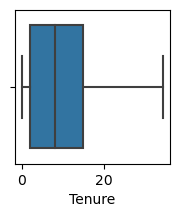

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


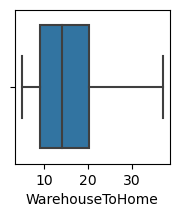

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


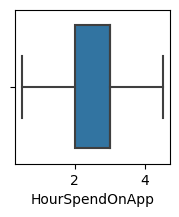

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


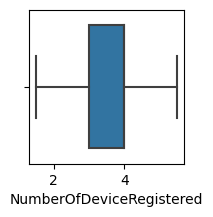

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


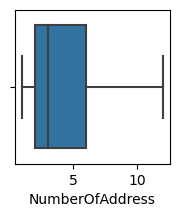

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


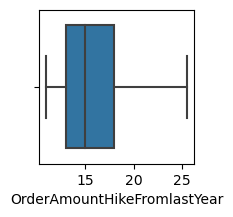

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


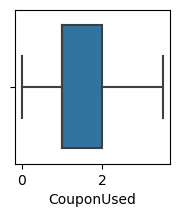

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


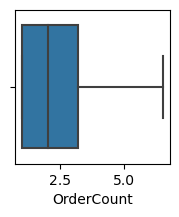

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


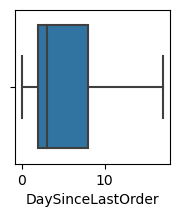

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


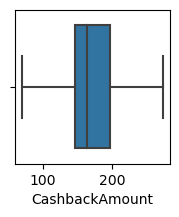

In [29]:
for i in df2.columns :
    q1 = x_df[i].quantile(0.25)
    q3 = x_df[i].quantile(0.75)
    iqr = q3-q1
    
    lt = q1 - 1.5*iqr
    ut = q3 + 1.5*iqr
    
    x_df.loc[x_df[i]<lt,i] = lt
    x_df.loc[x_df[i]>ut,i] = ut
    
    plt.figure(figsize = (2,2))
    sns.boxplot(x_df[i])
    plt.show()
    

In [30]:
df3 = pd.concat([x_df,df[['Churn']]],axis = 1)
df3.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,Churn
0,4.0,0.0,3.0,6.0,1.0,1.0,3.0,3.0,2.0,0.0,...,1.0,1.0,5.0,159.93,0.0,0.0,1.0,0.0,0.0,1
1,10.0,0.0,1.0,8.0,3.0,0.0,3.0,4.0,3.0,0.0,...,0.0,1.0,0.0,120.90,0.0,0.0,0.0,1.0,0.0,1
2,9.0,0.0,1.0,30.0,1.0,0.0,2.0,4.0,3.0,0.0,...,0.0,1.0,3.0,120.28,0.0,0.0,0.0,1.0,0.0,1
3,0.0,0.0,3.0,15.0,1.0,0.0,2.0,4.0,5.0,0.0,...,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,1.0,12.0,2.0,0.0,2.2,3.0,5.0,0.0,...,1.0,1.0,3.0,129.60,0.0,0.0,0.0,1.0,0.0,1


##  Assumptions
### 1. Linearity

In [31]:
df3.corr().head(1)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,Churn
Tenure,1.0,-0.045548,-0.056571,-0.030314,-0.001156,0.04293,0.010144,-0.011839,-0.018272,0.104554,...,0.145234,0.187508,0.185616,0.486867,0.110114,0.348778,-0.03947,-0.346795,0.268606,-0.348265


### 2. Independence

In [32]:
x_df.corr()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
Tenure,1.000000,-0.045548,-0.056571,-0.030314,-0.001156,0.042930,0.010144,-0.011839,-0.018272,0.104554,...,-0.001006,0.145234,0.187508,0.185616,0.486867,0.110114,0.348778,-0.039470,-0.346795,0.268606
PreferredLoginDevice,-0.045548,1.000000,-0.002476,0.014806,-0.028144,-0.015871,-0.016265,0.019154,-0.036049,-0.028785,...,0.010156,0.012172,0.024384,0.004826,-0.043673,-0.019611,-0.010534,0.046380,-0.006227,-0.045577
CityTier,-0.056571,-0.002476,1.000000,0.002022,0.359504,0.025176,-0.001641,0.026060,-0.011554,-0.006818,...,-0.033044,0.020552,0.037657,0.030544,0.071824,0.063189,0.004160,0.226587,-0.255624,-0.042998
WarehouseToHome,-0.030314,0.014806,0.002022,1.000000,0.035590,0.005912,0.063627,0.018611,0.019076,0.010305,...,0.054283,-0.003203,0.023574,0.008286,-0.000975,0.028153,0.031426,0.037542,-0.040416,-0.078921
PreferredPaymentMode,-0.001156,-0.028144,0.359504,0.035590,1.000000,0.009354,-0.008892,0.016268,0.021139,0.034185,...,-0.005361,0.001399,-0.003380,0.022906,0.061164,0.019938,-0.001375,0.105028,-0.133301,0.033602
Gender,0.042930,-0.015871,0.025176,0.005912,0.009354,1.000000,0.020907,0.022710,0.035220,-0.017370,...,0.000478,0.025848,0.045621,0.018288,0.032367,0.025097,0.048071,0.019739,-0.049438,-0.033147
HourSpendOnApp,0.010144,-0.016265,-0.001641,0.063627,-0.008892,0.020907,1.000000,0.325938,0.029537,0.041997,...,0.109479,0.261442,0.144600,0.103095,0.146299,0.004746,-0.036232,-0.019880,0.043742,-0.018025
NumberOfDeviceRegistered,-0.011839,0.019154,0.026060,0.018611,0.016268,0.022710,0.325938,1.000000,-0.015235,-0.034545,...,0.073528,0.201488,0.112871,0.041891,0.141090,0.037329,-0.034211,-0.008118,-0.009603,0.019976
SatisfactionScore,-0.018272,-0.036049,-0.011554,0.019076,0.021139,0.035220,0.029537,-0.015235,1.000000,0.044816,...,-0.027527,0.016374,0.016976,0.024062,0.003386,0.011944,0.002287,-0.019501,0.008823,0.001442
MaritalStatus,0.104554,-0.028785,-0.006818,0.010305,0.034185,-0.017370,0.041997,-0.034545,0.044816,1.000000,...,-0.013027,0.048683,0.060080,0.044090,0.085800,0.023491,0.048402,0.011773,-0.072995,0.041047


## 3. No Multicollinearity

In [33]:
for i in range(x_df.columns.shape[0]) :
    vif = variance_inflation_factor(x_df,i)
    print(f"vif of {x_df.columns[i]} = {vif}")

vif of Tenure = 1.4704246055632015
vif of PreferredLoginDevice = 1.0117690658343623
vif of CityTier = 1.2563679767816118
vif of WarehouseToHome = 1.0242042090639856
vif of PreferredPaymentMode = 1.1608211643585173
vif of Gender = 1.013087360465703
vif of HourSpendOnApp = 1.3966103710619333
vif of NumberOfDeviceRegistered = 1.1981791105623598
vif of SatisfactionScore = 1.0150234561702205
vif of MaritalStatus = 1.0243297728432643
vif of NumberOfAddress = 1.1608827676749107
vif of Complain = 1.0096920434027568
vif of OrderAmountHikeFromlastYear = 1.0212996449819494
vif of CouponUsed = 1.9974248458566424
vif of OrderCount = 2.2513459532952957
vif of DaySinceLastOrder = 1.5281481742823784
vif of CashbackAmount = 8.36111587733182
vif of PreferedOrderCat_Fashion = 26.979928811197883
vif of PreferedOrderCat_Grocery = 20.018295798308
vif of PreferedOrderCat_Laptop & Accessory = 46.00790734160814
vif of PreferedOrderCat_Mobile = 35.57270658660858
vif of PreferedOrderCat_Others = 14.1471510592738

## Sampling

In [34]:
y  = df['Churn']
y.value_counts()/len(y) * 100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

In [35]:
smote = SMOTE(sampling_strategy = 0.85)
x_re,y_re = smote.fit_resample(x_df,y)

In [36]:
y_re.value_counts()/len(y_re) * 100

0    54.058423
1    45.941577
Name: Churn, dtype: float64

# Model Training

### 1. Logistic Regression

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_re,y_re,test_size = 0.3,random_state = 42,stratify = y_re)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6062, 22), (2599, 22), (6062,), (2599,))

In [40]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
def model_eval(x,y,model):
    y_pred = model.predict(x)
    
    cm = confusion_matrix(y,y_pred)
    print(f"Confusion Matrix = \n{cm}")
    print('*'*30)
    
    clf = classification_report(y,y_pred)
    print(f"Classification Report = {clf}")
    print('*'*30)
    
    recall = recall_score(y,y_pred)
    print(f"Recall Score = {recall}")
    print(30*'*')
    
    precision = precision_score(y,y_pred)
    print(f"Precision Score = {precision}")
    print('*'*30)
    
    f1 = f1_score(y,y_pred)
    print(f"F1 Score = {f1}")
    print('*'*30)
    
    acc = accuracy_score(y,y_pred)
    print(f"Accuracy Score = {acc}")
    
    return

In [42]:
## Training
model_eval(x_train,y_train,lr)

Confusion Matrix = 
[[2677  600]
 [ 496 2289]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.84      0.82      0.83      3277
           1       0.79      0.82      0.81      2785

    accuracy                           0.82      6062
   macro avg       0.82      0.82      0.82      6062
weighted avg       0.82      0.82      0.82      6062

******************************
Recall Score = 0.821903052064632
******************************
Precision Score = 0.7923156801661475
******************************
F1 Score = 0.8068382093761016
******************************
Accuracy Score = 0.8192015836357638


In [43]:
## Testing 
model_eval(x_test,y_test,lr)

Confusion Matrix = 
[[1138  267]
 [ 214  980]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1405
           1       0.79      0.82      0.80      1194

    accuracy                           0.81      2599
   macro avg       0.81      0.82      0.81      2599
weighted avg       0.82      0.81      0.82      2599

******************************
Recall Score = 0.8207705192629816
******************************
Precision Score = 0.7858861267040899
******************************
F1 Score = 0.8029496108152397
******************************
Accuracy Score = 0.8149288187764525


## 2. K Nearest Neighbors Classifier

In [44]:
x_df.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,4.0,0.0,3.0,6.0,1.0,1.0,3.0,3.0,2.0,0.0,...,11.0,1.0,1.0,5.0,159.93,0.0,0.0,1.0,0.0,0.0
1,10.0,0.0,1.0,8.0,3.0,0.0,3.0,4.0,3.0,0.0,...,15.0,0.0,1.0,0.0,120.90,0.0,0.0,0.0,1.0,0.0
2,9.0,0.0,1.0,30.0,1.0,0.0,2.0,4.0,3.0,0.0,...,14.0,0.0,1.0,3.0,120.28,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,3.0,15.0,1.0,0.0,2.0,4.0,5.0,0.0,...,23.0,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,12.0,2.0,0.0,2.2,3.0,5.0,0.0,...,11.0,1.0,1.0,3.0,129.60,0.0,0.0,0.0,1.0,0.0


In [45]:
df4 = x_df.drop(['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery',
         'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile',
         'PreferedOrderCat_Others','MaritalStatus','CityTier','Complain','SatisfactionScore'],axis = 1)
df4.head()      

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3.0,9.0,11.0,1.0,1.0,5.0,159.93
1,10.0,8.0,3.0,4.0,7.0,15.0,0.0,1.0,0.0,120.90
2,9.0,30.0,2.0,4.0,6.0,14.0,0.0,1.0,3.0,120.28
3,0.0,15.0,2.0,4.0,8.0,23.0,0.0,1.0,3.0,134.07
4,0.0,12.0,2.2,3.0,3.0,11.0,1.0,1.0,3.0,129.60


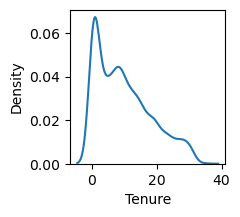

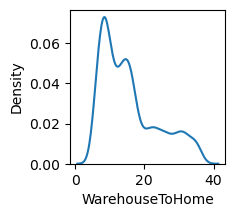

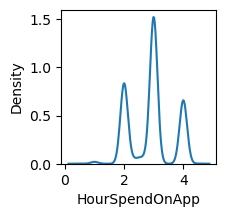

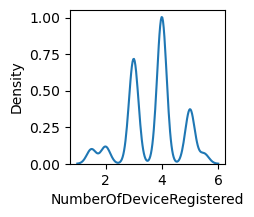

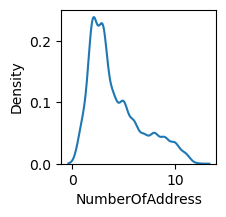

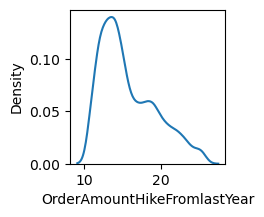

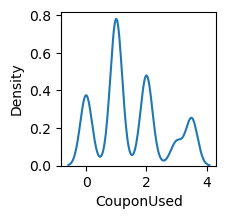

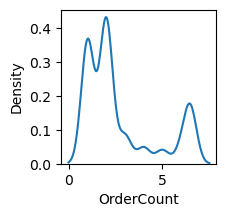

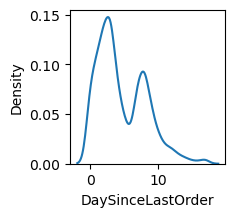

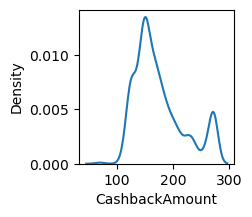

In [46]:
for i in df4.columns :
    plt.figure(figsize = (2,2))
    sns.kdeplot(df4[i])
    plt.show()

#### Data is not normal so we use normalization

In [47]:
normal_scaler = MinMaxScaler()
arr = normal_scaler.fit_transform(x_re)
x_norm = pd.DataFrame(arr,columns = x_df.columns)
x_norm.head(5)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,0.115942,0.0,1.0,0.03125,0.25,1.0,0.625,0.375,0.25,0.0,...,0.000000,0.285714,0.0,0.294118,0.444929,0.0,0.0,1.0,0.0,0.0
1,0.289855,0.0,0.0,0.09375,0.75,0.0,0.625,0.625,0.50,0.0,...,0.275862,0.000000,0.0,0.000000,0.252179,0.0,0.0,0.0,1.0,0.0
2,0.260870,0.0,0.0,0.78125,0.25,0.0,0.375,0.625,0.50,0.0,...,0.206897,0.000000,0.0,0.176471,0.249117,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.0,1.0,0.31250,0.25,0.0,0.375,0.625,1.00,0.0,...,0.827586,0.000000,0.0,0.176471,0.317219,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.0,0.0,0.21875,0.50,0.0,0.425,0.375,1.00,0.0,...,0.000000,0.285714,0.0,0.176471,0.295144,0.0,0.0,0.0,1.0,0.0


In [48]:
x_norm.shape

(8661, 22)

### Model Training

In [49]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_norm,y_re,test_size = 0.3,random_state = 123,stratify = y_re)
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((6062, 22), (2599, 22), (6062,), (2599,))

In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train1,y_train1)

KNeighborsClassifier()

In [51]:
## Training
model_eval(x_train1,y_train1,knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix = 
[[3121  156]
 [   2 2783]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       1.00      0.95      0.98      3277
           1       0.95      1.00      0.97      2785

    accuracy                           0.97      6062
   macro avg       0.97      0.98      0.97      6062
weighted avg       0.98      0.97      0.97      6062

******************************
Recall Score = 0.9992818671454219
******************************
Precision Score = 0.946920721333787
******************************
F1 Score = 0.972396925227114
******************************
Accuracy Score = 0.9739359947212142


In [52]:
## Testing
model_eval(x_test1,y_test1,knn)

Confusion Matrix = 
[[1271  134]
 [   6 1188]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       1.00      0.90      0.95      1405
           1       0.90      0.99      0.94      1194

    accuracy                           0.95      2599
   macro avg       0.95      0.95      0.95      2599
weighted avg       0.95      0.95      0.95      2599

******************************
Recall Score = 0.9949748743718593
******************************
Precision Score = 0.8986384266263238
******************************
F1 Score = 0.9443561208267091
******************************
Accuracy Score = 0.9461331281262024


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Hyperparameter Tunning

In [53]:
knn2 = KNeighborsClassifier()
params = {'n_neighbors':np.arange(3,25),'p':[1,2]}
rscv = RandomizedSearchCV(knn2,params)
rscv.fit(x_train1,y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24]),
                                        'p': [1, 2]})

In [54]:
rscv.best_params_

{'p': 1, 'n_neighbors': 5}

In [55]:
rscv.best_estimator_

KNeighborsClassifier(p=1)

In [56]:
knn_hyp = KNeighborsClassifier(n_neighbors=3)
knn_hyp.fit(x_train1,y_train1)

KNeighborsClassifier(n_neighbors=3)

In [57]:
## Training
model_eval(x_train1,y_train1,knn_hyp)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix = 
[[3209   68]
 [   1 2784]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3277
           1       0.98      1.00      0.99      2785

    accuracy                           0.99      6062
   macro avg       0.99      0.99      0.99      6062
weighted avg       0.99      0.99      0.99      6062

******************************
Recall Score = 0.999640933572711
******************************
Precision Score = 0.9761570827489481
******************************
F1 Score = 0.9877594465141033
******************************
Accuracy Score = 0.988617617947872


In [58]:
model_eval(x_test1,y_test1,knn_hyp)

Confusion Matrix = 
[[1317   88]
 [   3 1191]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1405
           1       0.93      1.00      0.96      1194

    accuracy                           0.96      2599
   macro avg       0.96      0.97      0.96      2599
weighted avg       0.97      0.96      0.97      2599

******************************
Recall Score = 0.9974874371859297
******************************
Precision Score = 0.9311962470680218
******************************
F1 Score = 0.9632025879498584
******************************
Accuracy Score = 0.9649865332820315


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 3. Decision Tree

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_re,y_re,test_size = 0.3,random_state = 55,stratify = y_re)
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((6062, 22), (2599, 22), (6062,), (2599,))

In [60]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
## Training
model_eval(x_train,y_train,dt_model)

Confusion Matrix = 
[[3277    0]
 [   0 2785]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      1.00      1.00      2785

    accuracy                           1.00      6062
   macro avg       1.00      1.00      1.00      6062
weighted avg       1.00      1.00      1.00      6062

******************************
Recall Score = 1.0
******************************
Precision Score = 1.0
******************************
F1 Score = 1.0
******************************
Accuracy Score = 1.0


In [62]:
## Testing
model_eval(x_test,y_test,dt_model)

Confusion Matrix = 
[[1361   44]
 [  36 1158]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1405
           1       0.96      0.97      0.97      1194

    accuracy                           0.97      2599
   macro avg       0.97      0.97      0.97      2599
weighted avg       0.97      0.97      0.97      2599

******************************
Recall Score = 0.9698492462311558
******************************
Precision Score = 0.9633943427620633
******************************
F1 Score = 0.9666110183639398
******************************
Accuracy Score = 0.9692189303578299


## Hyperparameter Tunning

In [63]:
dt_model_hp = DecisionTreeClassifier(random_state = 15)
hype = {'criterion':['gini','entropy'],
       'max_depth':np.arange(3,10),
       "min_samples_split":np.arange(3,20),
       "min_samples_leaf":np.arange(3,20)}

rscv = RandomizedSearchCV(dt_model_hp,hype)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=15),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [64]:
rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_depth': 7,
 'criterion': 'gini'}

In [65]:
rscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=7,
                       random_state=15)

In [66]:
dt_model_hyp = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=12,
                       min_samples_split=7, random_state=15)
dt_model_hyp.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=12,
                       min_samples_split=7, random_state=15)

In [67]:
## Training 
model_eval(x_train,y_train,dt_model_hyp)

Confusion Matrix = 
[[3071  206]
 [ 243 2542]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.93      0.94      0.93      3277
           1       0.93      0.91      0.92      2785

    accuracy                           0.93      6062
   macro avg       0.93      0.92      0.93      6062
weighted avg       0.93      0.93      0.93      6062

******************************
Recall Score = 0.9127468581687612
******************************
Precision Score = 0.9250363901018923
******************************
F1 Score = 0.9188505331646485
******************************
Accuracy Score = 0.9259320356318047


In [68]:
## Testing
model_eval(x_test,y_test,dt_model_hyp)

Confusion Matrix = 
[[1304  101]
 [ 145 1049]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1405
           1       0.91      0.88      0.90      1194

    accuracy                           0.91      2599
   macro avg       0.91      0.90      0.90      2599
weighted avg       0.91      0.91      0.91      2599

******************************
Recall Score = 0.8785594639865997
******************************
Precision Score = 0.9121739130434783
******************************
F1 Score = 0.8950511945392492
******************************
Accuracy Score = 0.905348210850327


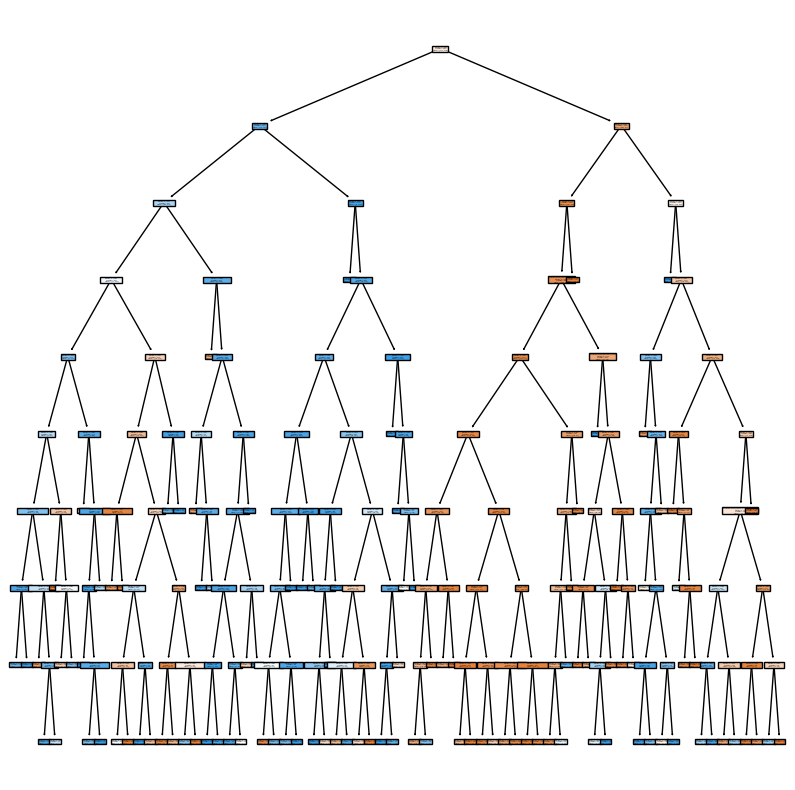

In [69]:
plt.figure(figsize = (10,10))
plot_tree(dt_model_hyp,feature_names = x_re.columns,filled = True)
plt.show()

## Prunning

In [70]:
dt_model_pr = DecisionTreeClassifier(random_state = 15)
dt_model_pr.fit(x_train,y_train)

DecisionTreeClassifier(random_state=15)

In [71]:
ccp = dt_model_pr.cost_complexity_pruning_path(x_train,y_train)
ccp['ccp_alphas']

array([0.00000000e+00, 1.07938137e-04, 1.39583280e-04, 1.44341801e-04,
       1.54651930e-04, 1.55258408e-04, 1.56440627e-04, 1.57106723e-04,
       1.57789795e-04, 1.58852353e-04, 1.59273712e-04, 1.59963208e-04,
       1.61662818e-04, 1.62571304e-04, 1.63336817e-04, 1.63458057e-04,
       1.63475914e-04, 1.63702806e-04, 1.63740118e-04, 1.64393224e-04,
       1.64962059e-04, 1.66763741e-04, 2.12427544e-04, 2.19345155e-04,
       2.19949412e-04, 2.19949412e-04, 2.19949412e-04, 2.19949412e-04,
       2.19949412e-04, 2.19949412e-04, 2.20904053e-04, 2.24531691e-04,
       2.46932395e-04, 2.47443088e-04, 2.47443088e-04, 2.47443088e-04,
       2.47443088e-04, 2.47443088e-04, 2.62223981e-04, 2.63939294e-04,
       2.63939294e-04, 2.67398176e-04, 2.74936765e-04, 2.74936765e-04,
       2.74936765e-04, 2.74936765e-04, 2.76014948e-04, 2.82406650e-04,
       2.82792101e-04, 2.88683603e-04, 2.88683603e-04, 2.93265882e-04,
       2.96931706e-04, 2.96931706e-04, 2.99605276e-04, 2.99931016e-04,
      

In [72]:
train_acc = []
test_acc = []
for i in ccp['ccp_alphas']:
    model_pr = DecisionTreeClassifier(random_state = 15,ccp_alpha = i)
    model_pr.fit(x_train,y_train)
    
    train_acc.append(model_pr.score(x_train,y_train))
    test_acc.append(model_pr.score(x_test,y_test))
    
acc_ccp = pd.DataFrame({'ccp_alpha':ccp['ccp_alphas'],"train_acc":train_acc,"test_acc":test_acc})
acc_ccp[10:30]

,ccp_alpha,train_acc,test_acc
10,0.000159,0.998020,0.968065
11,0.000160,0.997855,0.968065
12,0.000162,0.997526,0.967680
13,0.000163,0.997361,0.968449
14,0.000163,0.997031,0.967680
15,0.000163,0.996701,0.966526
16,0.000163,0.996536,0.967295
17,0.000164,0.996371,0.967295
18,0.000164,0.996206,0.966910
19,0.000164,0.996041,0.966526


In [73]:
np.argmax(test_acc)

0

In [74]:
model_pr = DecisionTreeClassifier(random_state = 15,ccp_alpha = 0.000264)
model_pr.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.000264, random_state=15)

In [75]:
model_eval(x_train,y_train,model_pr)

Confusion Matrix = 
[[3257   20]
 [  32 2753]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3277
           1       0.99      0.99      0.99      2785

    accuracy                           0.99      6062
   macro avg       0.99      0.99      0.99      6062
weighted avg       0.99      0.99      0.99      6062

******************************
Recall Score = 0.9885098743267504
******************************
Precision Score = 0.9927875946628201
******************************
F1 Score = 0.9906441165887011
******************************
Accuracy Score = 0.9914219729462224


In [76]:
model_eval(x_test,y_test,model_pr)

Confusion Matrix = 
[[1359   46]
 [  60 1134]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1405
           1       0.96      0.95      0.96      1194

    accuracy                           0.96      2599
   macro avg       0.96      0.96      0.96      2599
weighted avg       0.96      0.96      0.96      2599

******************************
Recall Score = 0.949748743718593
******************************
Precision Score = 0.9610169491525423
******************************
F1 Score = 0.9553496208930076
******************************
Accuracy Score = 0.9592150827241247


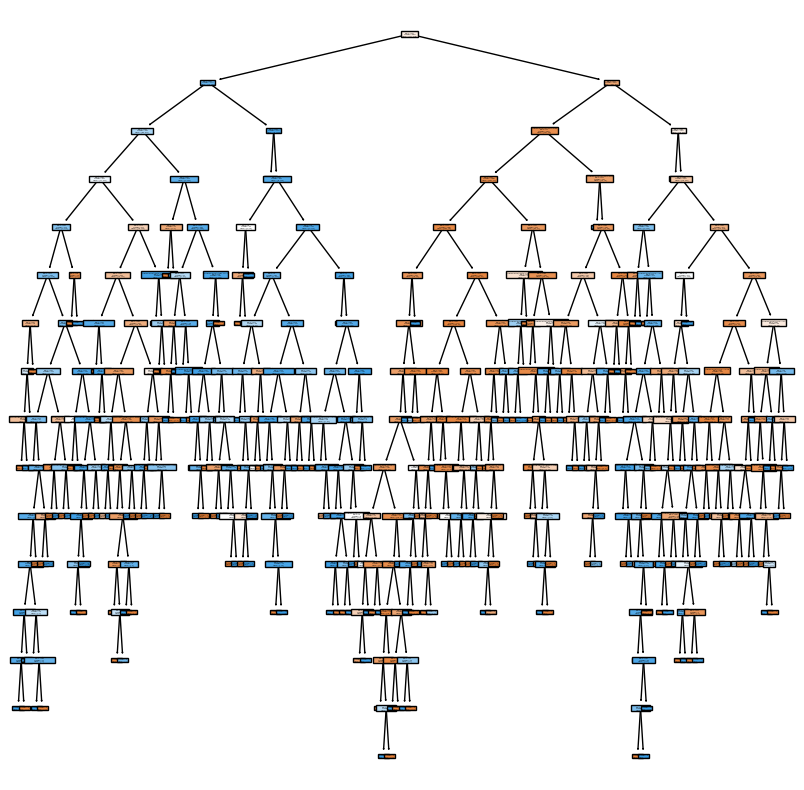

In [77]:
plt.figure(figsize = (10,10))
plot_tree(model_pr,feature_names = x_re.columns,filled = True)
plt.show()

## Cross Validation

In [78]:
dt_model_cv = DecisionTreeClassifier(random_state = 15)
hype = {'criterion':['gini','entropy'],
       'max_depth':np.arange(3,10),
       "min_samples_split":np.arange(3,20),
       "min_samples_leaf":np.arange(3,20)}

rscv = RandomizedSearchCV(dt_model_cv,hype,cv = 7)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=15),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [79]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=14,
                       min_samples_split=14, random_state=15)

In [80]:
model_dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=7,
                       min_samples_split=8, random_state=15)
model_dtcv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=7,
                       min_samples_split=8, random_state=15)

## Training

In [81]:
model_eval(x_train,y_train,model_dtcv)

Confusion Matrix = 
[[3090  187]
 [ 215 2570]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3277
           1       0.93      0.92      0.93      2785

    accuracy                           0.93      6062
   macro avg       0.93      0.93      0.93      6062
weighted avg       0.93      0.93      0.93      6062

******************************
Recall Score = 0.9228007181328546
******************************
Precision Score = 0.9321726514327168
******************************
F1 Score = 0.9274630097437749
******************************
Accuracy Score = 0.9336852523919499


In [82]:
## Testing
model_eval(x_test,y_test,model_dtcv)

Confusion Matrix = 
[[1305  100]
 [ 132 1062]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1405
           1       0.91      0.89      0.90      1194

    accuracy                           0.91      2599
   macro avg       0.91      0.91      0.91      2599
weighted avg       0.91      0.91      0.91      2599

******************************
Recall Score = 0.8894472361809045
******************************
Precision Score = 0.9139414802065404
******************************
F1 Score = 0.9015280135823429
******************************
Accuracy Score = 0.9107348980377068


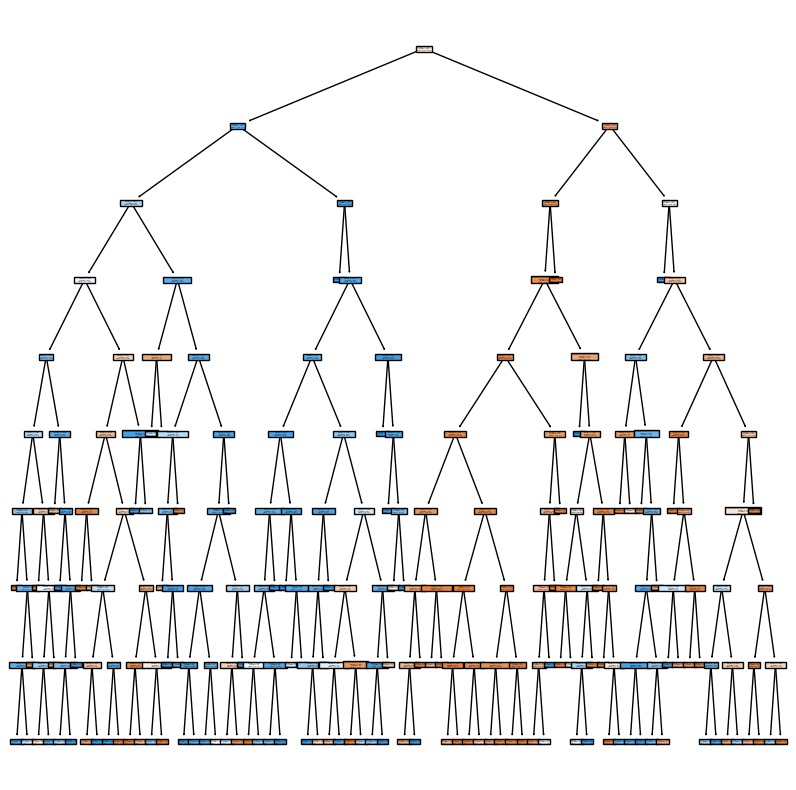

In [83]:
plt.figure(figsize = (10,10))
plot_tree(model_dtcv,feature_names = x_re.columns,filled = True)
plt.show()

# 4. Random Forest Classifier

In [84]:
rf_model = RandomForestClassifier(random_state =  15)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=15)

In [85]:
## Training
model_eval(x_train,y_train,rf_model)

Confusion Matrix = 
[[3277    0]
 [   0 2785]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      1.00      1.00      2785

    accuracy                           1.00      6062
   macro avg       1.00      1.00      1.00      6062
weighted avg       1.00      1.00      1.00      6062

******************************
Recall Score = 1.0
******************************
Precision Score = 1.0
******************************
F1 Score = 1.0
******************************
Accuracy Score = 1.0


In [86]:
## Testing
model_eval(x_test,y_test,rf_model)

Confusion Matrix = 
[[1380   25]
 [  18 1176]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1405
           1       0.98      0.98      0.98      1194

    accuracy                           0.98      2599
   macro avg       0.98      0.98      0.98      2599
weighted avg       0.98      0.98      0.98      2599

******************************
Recall Score = 0.9849246231155779
******************************
Precision Score = 0.9791840133222315
******************************
F1 Score = 0.9820459290187892
******************************
Accuracy Score = 0.9834551750673336


##  Hyperparameter Tunning

In [87]:
rf_model_hp = RandomForestClassifier(random_state = 15)
params = {"n_estimators":np.arange(10,250),
         "criterion":['gini','entropy'],
         'max_depth':np.arange(3,10),
         "min_samples_split":np.arange(3,10),
         "min_samples_leaf":np.arange(3,10)}

rscv = RandomizedSearchCV(rf_model_hp,params)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=15),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,...
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       

In [88]:
rscv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=179, random_state=15)

In [89]:
rf_model_hyp = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=185, random_state=15)
rf_model_hyp.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=185, random_state=15)

In [90]:
## Training
model_eval(x_train,y_train,rf_model_hyp)

Confusion Matrix = 
[[3177  100]
 [ 180 2605]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3277
           1       0.96      0.94      0.95      2785

    accuracy                           0.95      6062
   macro avg       0.95      0.95      0.95      6062
weighted avg       0.95      0.95      0.95      6062

******************************
Recall Score = 0.9353680430879713
******************************
Precision Score = 0.9630314232902033
******************************
F1 Score = 0.9489981785063751
******************************
Accuracy Score = 0.953810623556582


In [91]:
## Testing 
model_eval(x_test,y_test,rf_model_hyp)

Confusion Matrix = 
[[1341   64]
 [ 109 1085]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1405
           1       0.94      0.91      0.93      1194

    accuracy                           0.93      2599
   macro avg       0.93      0.93      0.93      2599
weighted avg       0.93      0.93      0.93      2599

******************************
Recall Score = 0.9087102177554439
******************************
Precision Score = 0.9442993907745866
******************************
F1 Score = 0.9261630388390952
******************************
Accuracy Score = 0.9334359368988072


## Prunning

In [92]:
rf_model_pr = RandomForestClassifier(random_state=15,ccp_alpha = 0.00043)
rf_model_pr.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.00043, random_state=15)

In [93]:
## Training
model_eval(x_train,y_train,rf_model_pr)

Confusion Matrix = 
[[3249   28]
 [  45 2740]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3277
           1       0.99      0.98      0.99      2785

    accuracy                           0.99      6062
   macro avg       0.99      0.99      0.99      6062
weighted avg       0.99      0.99      0.99      6062

******************************
Recall Score = 0.9838420107719928
******************************
Precision Score = 0.9898843930635838
******************************
F1 Score = 0.9868539528182964
******************************
Accuracy Score = 0.987957769712966


In [94]:
## Testing
model_eval(x_test,y_test,rf_model_pr)

Confusion Matrix = 
[[1366   39]
 [  64 1130]]
******************************
Classification Report =               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1405
           1       0.97      0.95      0.96      1194

    accuracy                           0.96      2599
   macro avg       0.96      0.96      0.96      2599
weighted avg       0.96      0.96      0.96      2599

******************************
Recall Score = 0.9463986599664992
******************************
Precision Score = 0.9666381522668948
******************************
F1 Score = 0.9564113415150234
******************************
Accuracy Score = 0.960369372835706


## Choosing a Model

In [95]:
model_acc = pd.DataFrame({
        'Model':['Logistic Regresssion','KNN Classifier',"Decision Tree Classifier",'Random Forest'],
        "train_acc":[lr.score(x_train,y_train),knn_hyp.score(x_train1,y_train1),model_pr.score(x_train,y_train),rf_model_pr.score(x_train,y_train)],
         "test_acc":[lr.score(x_test,y_test),knn_hyp.score(x_test1,y_test1),model_pr.score(x_test,y_test),rf_model_pr.score(x_test,y_test)]})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [96]:
model_acc.set_index('Model')

,train_acc,test_acc
Model,,
Logistic Regresssion,0.820191,0.812620
KNN Classifier,0.988618,0.964987
Decision Tree Classifier,0.991422,0.959215
Random Forest,0.987958,0.960369


In [97]:
x_re.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others'],
      dtype='object')

## User Defined Function

In [98]:
with open('random_forest_model.pkl','wb') as file:
    pickle.dump(knn_hyp,file)

In [106]:
project_data = {'columns':x_re.columns.tolist(),
                'PreferredLoginDevice':{'Mobile Phone': 0, 'Computer': 1, 'Phone': 0},
                'PreferredPaymentMode':{ 'Debit Card': 1,
                                     'Credit Card': 2,
                                     'E wallet': 4,
                                     'UPI': 3,
                                     'Cash on Delivery': 0},
                'Gender' :{'Male': 0, 'Female': 1},
                'MaritalStatus' : {'Married': 1, 'Single': 0, 'Divorced': 2}}
project_data
                
                
                
                
        

{'columns': ['Tenure',
  'PreferredLoginDevice',
  'CityTier',
  'WarehouseToHome',
  'PreferredPaymentMode',
  'Gender',
  'HourSpendOnApp',
  'NumberOfDeviceRegistered',
  'SatisfactionScore',
  'MaritalStatus',
  'NumberOfAddress',
  'Complain',
  'OrderAmountHikeFromlastYear',
  'CouponUsed',
  'OrderCount',
  'DaySinceLastOrder',
  'CashbackAmount',
  'PreferedOrderCat_Fashion',
  'PreferedOrderCat_Grocery',
  'PreferedOrderCat_Laptop & Accessory',
  'PreferedOrderCat_Mobile',
  'PreferedOrderCat_Others'],
 'PreferredLoginDevice': {'Mobile Phone': 0, 'Computer': 1, 'Phone': 0},
 'PreferredPaymentMode': {'Debit Card': 1,
  'Credit Card': 2,
  'E wallet': 4,
  'UPI': 3,
  'Cash on Delivery': 0},
 'Gender': {'Male': 0, 'Female': 1},
 'MaritalStatus': {'Married': 1, 'Single': 0, 'Divorced': 2}}

In [107]:
with open('project_data.json','w') as file :
    json.dump(project_data,file)

In [108]:
project_data['columns']

['Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Others']

In [109]:
x_re.iloc[0:1,10:]

,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,0.0,0.0,1.0,0.0,0.0


In [110]:
Tenure = 4
PreferredLoginDevice = 'Mobile Phone'
CityTier = 3
WarehouseToHome = 6
PreferredPaymentMode = 'Debit Card'
Gender = 'Female'
HourSpendOnApp = 3
NumberOfDeviceRegistered = 3
SatisfactionScore = 2
MaritalStatus = 'Single'
NumberOfAddress = 9
Complain = 1
OrderAmountHikeFromlastYear = 11
CouponUsed = 1 
OrderCount = 1
DaySinceLastOrder = 5
CashbackAmount =  159.93
PreferedOrderCat1 = "Laptop & Accessory"

In [111]:
user_data = np.zeros(len(project_data['columns']))

user_data[0] = Tenure
user_data[1] = project_data['PreferredLoginDevice'][PreferredLoginDevice]
user_data[2] = CityTier
user_data[3] = WarehouseToHome
user_data[4] = project_data['PreferredPaymentMode'][PreferredPaymentMode]
user_data[5] = project_data['Gender'][Gender]
user_data[6] = HourSpendOnApp
user_data[7] = NumberOfDeviceRegistered
user_data[8] = SatisfactionScore
user_data[9] = project_data['MaritalStatus'][MaritalStatus]
user_data[10] = NumberOfAddress
user_data[11] = Complain
user_data[12] = OrderAmountHikeFromlastYear
user_data[13] = CouponUsed
user_data[14] = OrderCount
user_data[15] = DaySinceLastOrder
user_data[16] = CashbackAmount


cat = 'PreferedOrderCat_'+PreferedOrderCat1
index = np.where(project_data['columns'] == cat)[0]

user_data[index] = 1

result = rf_model_pr.predict([user_data])[0]
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

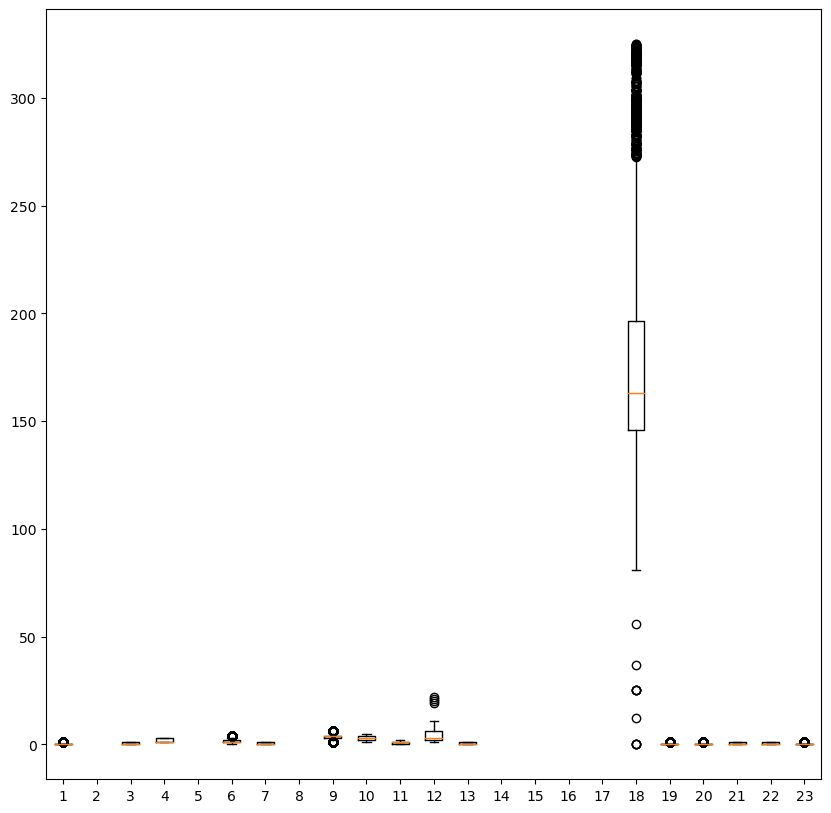

In [105]:
plt.figure(figsize = (10,10))
plt.boxplot(df)
plt.show()